<a href="https://colab.research.google.com/github/jhenryshaw4/1.041/blob/main/1_041PS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1

In [120]:
#list of positions of A
a = [0]
#list of positions of B
b = [0]

#traffic light phasing- 0 = red, 1= green
tl = 0


i = 0
t = [0]
while a[-1] < 1500 or b[-1] < 1500:
  i += 1
  t.append(t[-1] + 1)
  #check if phase should switch 
  if i == 30 and tl == 0:
    i == 0
    tl = 1
  if i == 30 and tl == 1:
    i == 0
    tl == 0
  
  #move A
  if (a[-1] == 600 or a[-1] == 1200) and tl == 0:
    a.append(a[-1])
  else:
    a.append(a[-1] + 20)

  #move B
  if t[-1] <= 20:
    b == b
  elif (b[-1] == 600 or b[-1] == 1200) and tl == 0:
    b.append(b[-1])
  else:
    b.append(b[-1] + 40)

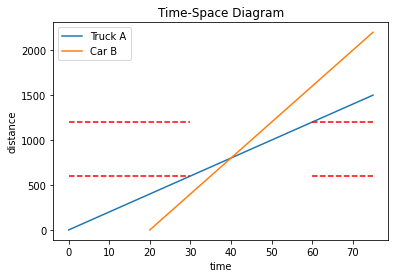

In [121]:
import matplotlib.pyplot as plt
t2 = []
for j in range(20, len(t)):
  t2.append(t[j])
#vehicles
plt.plot(t, a, label="Truck A")
plt.plot(t2, b, label="Car B")
plt.plot()
plt.xlabel("time")
plt.ylabel("distance")
plt.title("Time-Space Diagram")
plt.legend()

#red lights
t_values = [0, 30]
t_values2 = [60, 75]
x_values = [600,600]
x_values2 = [1200,1200]
plt.plot(t_values, x_values, 'red', linestyle="--")
plt.plot(t_values, x_values2, 'red', linestyle="--")
plt.plot(t_values2, x_values, 'red', linestyle="--")
plt.plot(t_values2, x_values2, 'red', linestyle="--")
plt.show()

In [122]:
for i in range(20,75):
  if a[i] == b[i-20]:
    print(i)
    break

40


Problem 2

In [123]:
a_arrivals = [0]
b_arrivals = [0]
a_departures = [0]
b_departures = [0]
a_arrivaltimes = [0]
b_arrivaltimes = [0]
a_departuretimes = [0]
b_departuretimes = [0]

#phase = 1: Green for A, Red for B
#phase = 2: Green for B, Red for A
phase = 1
for t in range(240):
  #change phase if necessary
  if (t % 60) == 0 and phase == 2:
    phase = 1
  elif (t % 60) == 0 and phase == 1:
    phase = 2
  
  #always add cars to arrival curves
  if (t % 3) == 0:
    a_arrivaltimes.append(t)
    a_arrivals.append(a_arrivals[-1] + 1)
  if (t % 2) == 0:
    b_arrivaltimes.append(t)
    b_arrivals.append(b_arrivals[-1] + 1)

  #update A departure curve
  #AND check that there is an available car to go
  if phase == 1 and a_departures[-1] != a_arrivals[-1]:
    a_departuretimes.append(t)
    a_departures.append(a_departures[-1] + 1)
  
  #update B departure curve
  if phase == 2 and b_departures[-1] != b_arrivals[-1]:
    b_departuretimes.append(t)
    b_departures.append(b_departures[-1] + 1)

b_departuretimes.append(240)
b_departures.append(b_departures[-1])

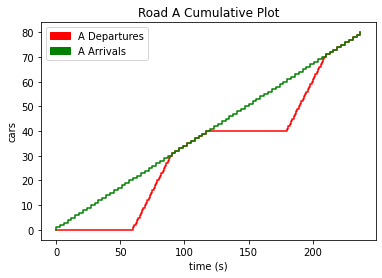

In [124]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.step(a_departuretimes, a_departures, color='red', where='post')
plt.step(a_arrivaltimes, a_arrivals, color='green', where='post')
plt.xlabel("time (s)")
plt.ylabel("cars")
plt.title("Road A Cumulative Plot")
red_patch = mpatches.Patch(color='red', label='A Departures')
green_patch = mpatches.Patch(color='green', label='A Arrivals')
plt.legend(handles=[red_patch, green_patch])
plt.plot()
plt.show()

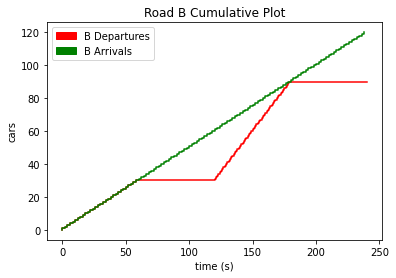

In [125]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.step(b_departuretimes, b_departures, color='red', where='post')
plt.step(b_arrivaltimes, b_arrivals, color='green', where='post')
plt.xlabel("time (s)")
plt.ylabel("cars")
plt.title("Road B Cumulative Plot")
red_patch = mpatches.Patch(color='red', label='B Departures')
green_patch = mpatches.Patch(color='green', label='B Arrivals')
plt.legend(handles=[red_patch, green_patch])
plt.plot()
plt.show()

In [13]:
total_waittimes = []
for x in range(120):
  wait = 0
  a_arrivals = [0]
  b_arrivals = [0]
  a_departures = [0]
  b_departures = [0]
  a_arrivaltimes = [0]
  b_arrivaltimes = [0]
  a_departuretimes = [0]
  b_departuretimes = [0]

  #phase = 1: Green for A, Red for B
  #phase = 2: Green for B, Red for A
  phase = 2
  for t in range(240):
    #change phase if necessary
    if t >= (120 + x):
      phase = 1
    elif t >= 120:
      phase = 2
    elif t >= x:
      phase = 1
    
    
    #always add cars to arrival curves
    if (t % 3) == 0:
      a_arrivaltimes.append(t)
      a_arrivals.append(a_arrivals[-1] + 1)
    if (t % 2) == 0:
      b_arrivaltimes.append(t)
      b_arrivals.append(b_arrivals[-1] + 1)

    #update A departure curve
    #AND check that there is an available car to go
    if phase == 1 and a_departures[-1] != a_arrivals[-1]:
      a_departuretimes.append(t)
      a_departures.append(a_departures[-1] + 1)
    
    #update B departure curve
    if phase == 2 and b_departures[-1] != b_arrivals[-1]:
      b_departuretimes.append(t)
      b_departures.append(b_departures[-1] + 1)

  #calculate wait
  for i in range(120):
    a_departuretimes.append(240)
    b_departuretimes.append(240)
  for car in a_arrivals:
    wait += a_departuretimes[car] - a_arrivaltimes[car]
  for car in b_arrivals:
    wait += b_departuretimes[car] - b_arrivaltimes[car]
  total_waittimes.append([x, wait])
print(total_waittimes)

[[0, 14520], [1, 14162], [2, 14045], [3, 13693], [4, 13580], [5, 13234], [6, 13125], [7, 12785], [8, 12680], [9, 12346], [10, 12245], [11, 11917], [12, 11820], [13, 11498], [14, 11405], [15, 11089], [16, 11000], [17, 10690], [18, 10605], [19, 10301], [20, 10220], [21, 9922], [22, 9845], [23, 9553], [24, 9480], [25, 9194], [26, 9125], [27, 8845], [28, 8780], [29, 8506], [30, 8445], [31, 8177], [32, 8120], [33, 7858], [34, 7805], [35, 7549], [36, 7500], [37, 7250], [38, 7205], [39, 6961], [40, 6920], [41, 6682], [42, 6645], [43, 6413], [44, 6380], [45, 6154], [46, 6125], [47, 5905], [48, 5880], [49, 5666], [50, 5645], [51, 5437], [52, 5420], [53, 5218], [54, 5205], [55, 5009], [56, 5000], [57, 4810], [58, 4805], [59, 4621], [60, 4620], [61, 4503], [62, 4565], [63, 4456], [64, 4520], [65, 4419], [66, 4485], [67, 4392], [68, 4460], [69, 4375], [70, 4445], [71, 4368], [72, 4440], [73, 4371], [74, 4445], [75, 4384], [76, 4460], [77, 4407], [78, 4485], [79, 4440], [80, 4520], [81, 4601], [82,

Text(0.5, 1.0, 'Signal Optimization')

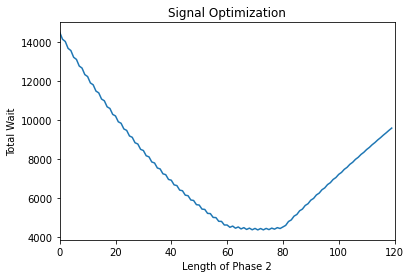

In [15]:
import matplotlib.pyplot as plt
y = []
x = []
for i in total_waittimes:
  x.append(i[0])
  y.append(i[1])
plt.plot(x, y, label="Waits")
plt.xlim(0, 120)
plt.xlabel("Length of Phase 2")
plt.ylabel("Total Wait")\

plt.title("Signal Optimization")

Problem 3

In [41]:
#Minutes left until counter available
c_arrivaltimes = []
a_in_use = 0
b_in_use = 0
a_arrivals = 0
a_departures = 0
b_arrivals = 0
b_departures = 0
a_arrivaltimes = []
a_departuretimes = []
b_arrivaltimes = []
b_departuretimes = []
a_line = []
b_line = []
a_type = []
b_type = []
#populating arrivals list
#general = 0, online = 1, exec = 2
arrivals = []
#arrival[time, type]
arrivals.append([1,1])
arrivals.append([3,0])
arrivals.append([4,2])
arrivals.append([4,1])
arrivals.append([6,1])
arrivals.append([10,0])
arrivals.append([12,2])
arrivals.append([15,1])
arrivals.append([16,2])
arrivals.append([20,0])

for t in range(60):
  #add people to line if necessary
  for arrival in arrivals:
    if arrival[0] == t:
      #for general passengers
      if arrival[1] == 0:
        a_arrivaltimes.append(t)
        a_line.append(arrival)
      #for exec and online passengers
      else:
        #check for empty counter A if busy counter B
        if b_in_use > 0 and (len(a_line) == 0 or a_in_use == 0):
          a_arrivaltimes.append(t)
          a_line.append(arrival)
        else:
          b_arrivals += 1
          b_arrivaltimes.append(t)
          b_line.append(arrival)

  #remove people from counters if applicable
  if a_in_use != 0:
    if a_in_use == 1:
      a_departures += 1
      a_departuretimes.append(t-a_type[-1])
      c_arrivaltimes.append(t)
    a_in_use -= 1
  if b_in_use != 0:
    if b_in_use == 1:
      b_departures += 1
      b_departuretimes.append(t-b_type[-1])
      c_arrivaltimes.append(t)
    b_in_use -= 1

  #add people to counters
  if len(a_line) > 0 and a_in_use == 0:
    p = a_line.pop(0)
    if p[1] == 0:
      a_in_use += 10
      a_type.append(10)
    elif p[1] == 1:
      a_in_use += 7
      a_type.append(7)
    else:
      a_in_use += 5
      a_type.append(5)
  if len(b_line) > 0 and b_in_use == 0:
    p = b_line.pop(0)
    if p[1] == 0:
      b_in_use += 10
      b_type.append(10)
    elif p[1] == 1:
      b_in_use += 7
      b_type.append(7)
    else:
      b_in_use += 5
      b_type.append(5)

a1 = []
a2 = []
b1 = []
b2 = []
for i in range(len(a_arrivaltimes)+1):
  a1.append(i)
for i in range(len(a_departuretimes)+1):
  a2.append(i)
for i in range(len(b_arrivaltimes)+1):
  b1.append(i)
for i in range(len(b_departuretimes)+1):
  b2.append(i)
a_arrivaltimes.append(a_arrivaltimes[-1])
b_arrivaltimes.append(b_arrivaltimes[-1])
a_departuretimes.append(a_departuretimes[-1])
b_departuretimes.append(b_departuretimes[-1])

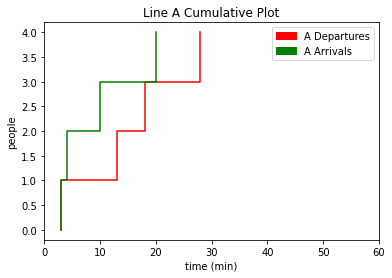

In [42]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.step(a_departuretimes, a2, color='red', where='pre')
plt.step(a_arrivaltimes, a1, color='green', where='pre')
plt.xlabel("time (min)")
plt.ylabel("people")
plt.title("Line A Cumulative Plot")
plt.xlim(0,60)
red_patch = mpatches.Patch(color='red', label='A Departures')
green_patch = mpatches.Patch(color='green', label='A Arrivals')
plt.legend(handles=[red_patch, green_patch])
plt.plot()
plt.show()

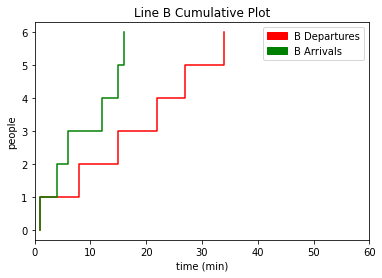

In [43]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.step(b_departuretimes, b2, color='red', where='pre')
plt.step(b_arrivaltimes, b1, color='green', where='pre')
plt.xlabel("time (min)")
plt.ylabel("people")
plt.title("Line B Cumulative Plot")
plt.xlim(0,60)
red_patch = mpatches.Patch(color='red', label='B Departures')
green_patch = mpatches.Patch(color='green', label='B Arrivals')
plt.legend(handles=[red_patch, green_patch])
plt.plot()
plt.show()

In [9]:
a_wait = 0
for i in range(len(a_departuretimes)-1):
  a_wait += a_departuretimes[i] - a_arrivaltimes[i]
b_wait = 0
for i in range(len(b_departuretimes)-1):
  b_wait += b_departuretimes[i] - b_arrivaltimes[i]
print(a_wait)
print(b_wait)

20
49


In [44]:
c_arrivaltimes

[8, 13, 15, 18, 22, 27, 28, 34, 38, 39]

In [47]:
c_in_use = 0
c_line = 0
c_departuretimes = []
for t in range(60):
  #add people to line if necessary
  for arrivaltime in c_arrivaltimes:
    if arrivaltime == t:
      c_line += 1

  #remove people from security if applicable
  if c_in_use != 0:
    if c_in_use == 1:
      c_departuretimes.append(t)
    c_in_use -= 1

  #add people to security
  if c_line > 0 and c_in_use == 0:
    c_in_use += 5
    c_line -= 1
  elif c_in_use > 0:
    c_in_use -= 1

c1 = []
c2 = []
for i in range(len(c_arrivaltimes)+1):
  c1.append(i)
for i in range(len(c_departuretimes)+1):
  c2.append(i)
c_arrivaltimes.append(c_arrivaltimes[-1])
c_departuretimes.append(c_departuretimes[-1])

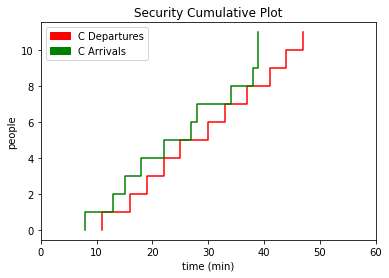

In [49]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.step(c_departuretimes, c2, color='red', where='pre')
plt.step(c_arrivaltimes, c1, color='green', where='pre')
plt.xlabel("time (min)")
plt.ylabel("people")
plt.title("Security Cumulative Plot")
plt.xlim(0,60)
red_patch = mpatches.Patch(color='red', label='C Departures')
green_patch = mpatches.Patch(color='green', label='C Arrivals')
plt.legend(handles=[red_patch, green_patch])
plt.plot()
plt.show()

In [51]:
wait = 0
for i in range(len(c_arrivaltimes)):
  wait += c_departuretimes[i] - c_arrivaltimes[i]
print(wait)

52


In [53]:
print(b_arrivaltimes)
print(b_departuretimes)
print(c_arrivaltimes)
print(c_departuretimes)

[1, 4, 6, 12, 15, 16, 16]
[1, 8, 15, 22, 27, 34, 34]
[8, 13, 15, 18, 22, 27, 28, 34, 38, 39, 39, 39]
[11, 16, 19, 22, 25, 30, 33, 37, 41, 44, 47, 47]


Problem 4

[25, 27.180642192599933, 29.31424710280753, 31.402811515642814, 33.44820728705872, 35.45219157794055, 37.41641605921451, 39.34243520993811, 41.23171381370775, 43.08563374470015, 44.905500122740285, 46.692546906613224, 48.4479419861271, 50.172791825956224, 51.868145707853955, 53.53499961226494, 55.174299775552726, 56.78694595488045, 58.373794429146486, 59.935660761205696, 61.47332234383431, 62.98752074946696, 64.47896390160102, 65.94832808388603, 67.39625980126053, 68.82337750603624, 70.23027320053457, 71.61751392673264, 72.98564315235582, 74.33518206194591, 75.66663076062517, 76.98046939755332, 78.27715921542891, 79.55714353180703, 80.82084865748647, 82.06868475675252, 83.30104665384216, 84.51831458961998, 85.72085493211202, 86.90902084423678, 88.0831529117934, 89.24357973451514, 90.39061848276664, 91.52457542225656, 92.64574640894725, 93.75441735617204, 94.85086467581397]
[0, 24.68600779315258, 51.53593309665328, 80.50394060809869, 111.54609655022573, 144.6202527414485, 179.6859399027

Text(0.5, 1.0, 'Forward Euler for Velocity')

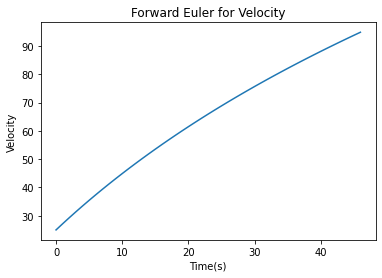

In [8]:
#Euler Forward
import math
import matplotlib.pyplot as plt
x_t = 0
x_t2 = 0
v_t = 25
v_t2 = 0
velocities = []
distances = []
accelerations = []
y = []
for t in range(47):
  v_t2 = v_t + 2.8*(math.e**(-.01*v_t))*1
  x_t2 = x_t + 100*math.log((2.8*t/100)+1.28)*1
  velocities.append(v_t)
  distances.append(x_t)
  accelerations.append(2.8*(math.e**(-.01*v_t)))
  v_t = v_t2
  x_t = x_t2
  y.append(t)
print(velocities)
print(distances)
print(accelerations)
plt.plot(y, velocities, label="Velocity Profile")
plt.xlabel("Time(s)")
plt.ylabel("Velocity")
plt.title("Forward Euler for Velocity")

Text(0.5, 1.0, 'Forward Euler for Distance')

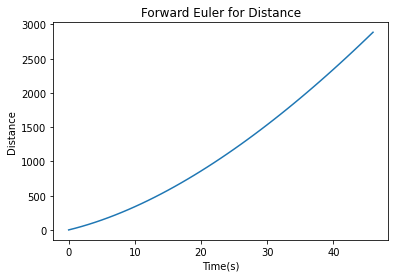

In [9]:
plt.plot(y, distances, label="Position Profile")
plt.xlabel("Time(s)")
plt.ylabel("Distance")
plt.title("Forward Euler for Distance")

In [35]:
#Heun Method
import math
x_t = 0
x_t2 = 0
v_t = 25
v_t2 = 0
y = []
velocities = []
distances = []
accelerations = []
for t in range(47):
  v_t2 = v_t + .5*(2.8*(math.e**(-.01*v_t))*1 + (700 / (7.1*t + 250*(math.e**(1/4)))) + .62)
  x_t2 = x_t + .5*(100*math.log((2.8*t/100)+1.28)*1 + 100*math.log((2.8*(t+1)/100)+1.28)*1)
  velocities.append(v_t)
  distances.append(x_t)
  accelerations.append([t,2.8*(math.e**(-.01*v_t))])
  y.append(t)
  v_t = v_t2
  x_t = x_t2

Text(0.5, 1.0, 'Heun for Velocity')

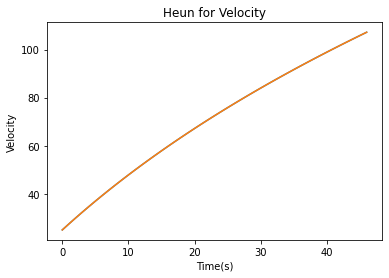

In [36]:
import matplotlib.pyplot as plt
plt.plot(y, velocities, label="Velocity Profile")
plt.xlabel("Time(s)")
plt.ylabel("Velocity")
plt.plot(y, velocities, label="Velocity Profile")
plt.title("Heun for Velocity")

Text(0.5, 1.0, 'Heun for Distance')

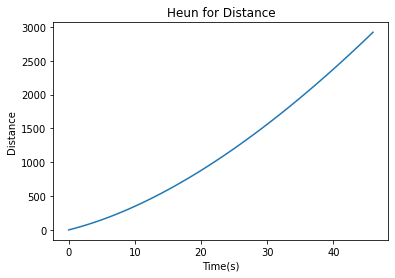

In [37]:
plt.plot(y, distances, label="Position Profile")
plt.xlabel("Time(s)")
plt.ylabel("Distance")
plt.title("Heun for Distance")

Probelm 5

[140, 280, 420, 560, 700, 840, 980, 1120, 1260, 1400, 1540, 1680, 1820, 1960, 2100, 2240, 2380, 2520, 2660, 2800, 2940, 3080, 3220, 3360, 3500, 3640, 3780, 3920, 4060, 4200, 4340, 4480, 4620, 4760, 4900, 5040, 5180, 5320, 5460, 5600, 5740, 5880, 6020, 6160, 6300, 6440, 6580, 6720, 6860, 7000, 7140, 7280, 7420, 7560, 7700, 7840, 7980, 8120, 8260, 8400, 8540, 8540]
[640, 800, 960, 1120, 1280, 1440, 1600, 1760, 1920, 2080, 2240, 2400, 2560, 2720, 2880, 3040, 3200, 3360, 3520, 3680, 3840, 4000, 4160, 4320, 4480, 4640, 4800, 4960, 5120, 5280, 5440, 5600, 5760, 5920, 6080, 6240, 6400, 6560, 6720, 6880, 7040, 7200, 7360, 7520, 7680, 7840, 8000, 8160, 8320, 8480, 8640, 8800, 8960, 9120, 9280, 9440, 9600, 9760, 9920, 10080, 10240, 10240]


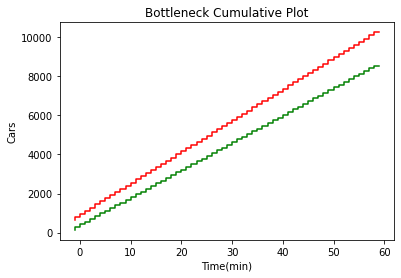

In [63]:
import matplotlib.pyplot as plt
arrivals_per_minute = 160
departures_per_minute = 140
queue_size = []
past_queue = 480
times = []
queue_departures = []
past_departures = 0
#each runthrough is one minute
for t in range(0,60):
  queue_size.append(past_queue+160)
  past_queue = queue_size[-1]
  times.append(t)
  queue_departures.append(past_departures + 140)
  past_departures = queue_departures[-1]


plt.step(times, queue_size, color='red', where='pre')
plt.step(times, queue_departures, color='green', where='pre')
queue_size.append(queue_size[-1])
queue_departures.append(queue_departures[-1])
plt.xlabel("Time(min)")
plt.ylabel("Cars")
plt.title("Bottleneck Cumulative Plot")
print(queue_departures)
print(queue_size)